In [1]:
from utilities import *

X, y, Xtest, yt = load_data() # chargement des training data et des test data

In [2]:
print(X.shape,y.shape) # On a 1000 photos de 64*64 pixels
print(np.unique(y,return_counts=True)) # 500 photos de chats, 500 photos de chien

(1000, 64, 64) (1000, 1)
(array([0., 1.]), array([500, 500]))


In [3]:
print(Xtest.shape,yt.shape) # plus 200 photos de test

(200, 64, 64) (200, 1)


/usr/lib/python3/dist-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


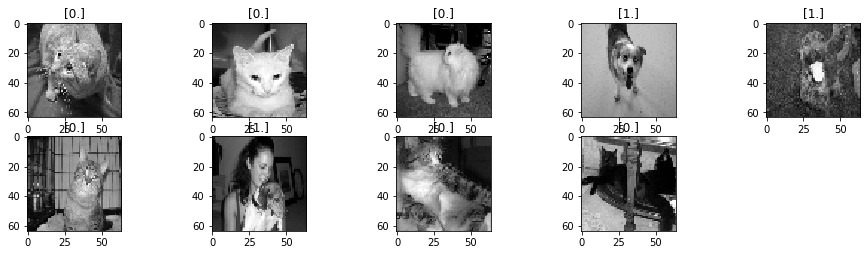

In [4]:
# Affichons quelques photos
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
for i in range(1,10):
    plt.subplot(4,5,i)
    plt.imshow(X[i],cmap='gray')
    plt.title(y[i])
    #plt.tight_layout()
plt.show()

In [5]:
# Une fois aplatie, chaque photo est un vecteur de 4096 pixels, 
# donc 4096 variables qui prennent des valeurs entre 0 et 255 (1 pixel = 8 bits)
# On commence donc par applatir nos images pour en faire un vecteur de 1000 lignes et 4096 caractéristiques
Xr=X.reshape(X.shape[0],X.shape[1]*X.shape[2])
X_train = Xr/255

Xt=Xtest.reshape(Xtest.shape[0],Xtest.shape[1]*Xtest.shape[2])
X_test = Xt/255
print(X_train.shape,X_test.shape)

(1000, 4096) (200, 4096)


In [6]:
# On initialise les paramètres du perceptron
def initParam(n):
    W=np.random.randn(n,1)
    b=np.random.randn(1)
    return (W,b)

In [7]:
W,b = initParam(Xr.shape[1])
print(W.shape,b)

(4096, 1) [0.52715374]


In [8]:
# On définit notre modèle avec la fonction sigmoïde
def perceptron(X,W,b):
    
    z = (X.dot(W)+ b)
    A = 1 / (1+np.exp(-z))
    return A

In [9]:
A=perceptron(X_train,W,b)
print(A)

[[1.29790695e-04]
 [3.19582702e-07]
 [9.99992972e-01]
 [1.55519758e-04]
 [2.35927549e-01]
 [2.83046341e-08]
 [3.69252276e-02]
 [9.82614244e-01]
 [4.72538058e-09]
 [9.99999998e-01]
 [9.97809678e-01]
 [8.46877344e-08]
 [2.96166480e-02]
 [1.35970259e-01]
 [3.04804382e-01]
 [9.99760093e-01]
 [2.85564794e-04]
 [2.99472644e-04]
 [3.30279421e-03]
 [1.32183345e-06]
 [7.54061441e-03]
 [9.92675664e-01]
 [3.45951329e-07]
 [3.44792508e-13]
 [9.67255371e-01]
 [4.32850224e-02]
 [1.56082323e-02]
 [9.99849059e-01]
 [9.99981251e-01]
 [1.70254303e-07]
 [1.96083101e-07]
 [2.32296605e-05]
 [7.03834311e-03]
 [9.99999997e-01]
 [3.42213594e-01]
 [9.86999196e-01]
 [9.01877750e-02]
 [9.46401899e-01]
 [2.06305045e-01]
 [9.99988622e-01]
 [6.29870550e-01]
 [5.51164912e-01]
 [8.56686985e-14]
 [9.99336476e-01]
 [5.47879420e-02]
 [9.15439539e-01]
 [4.45538131e-05]
 [1.37654201e-01]
 [3.11501031e-01]
 [9.98585409e-01]
 [4.84099767e-01]
 [2.87667576e-04]
 [9.99851804e-01]
 [9.86655058e-01]
 [3.84023584e-01]
 [2.218317

In [10]:
#pour la minimisation de l'erreur quadratique
def errQ(A,y):
    m=len(y)
    return np.sum((A-y)**2)/m

In [11]:
print(errQ(A,y))

0.5146345170021248


In [12]:
#pour la maximisation de la vraisemblance
def logloss(A,y):
    eps=1e-15
    m=len(y)
    return -(np.sum(y*np.log(A+eps)+(1-y)*np.log(1-A+eps)))/m

In [13]:
print(logloss(A,y))

6.164932221347716


In [14]:
# On détermine le gradient de l'erreur quadratique
def gradient_erreurQ(A,X,y):
    
    m = len(y)
    db = np.sum( (A-y) * A * (1-A) ) /m
    dW = np.dot(X.T,(A-y) * A * (1-A) ) /m
    
    return (dW,db)

In [15]:
dW,db = gradient_erreurQ(A,X_train,y)
print(dW.shape,db.shape)
print(dW,db)

(4096, 1) ()
[[-0.00083538]
 [-0.0008126 ]
 [-0.00078875]
 ...
 [-0.00066847]
 [-0.00053744]
 [-0.00051527]] -0.0009446502892566461


In [16]:
# on met à jour les paramètres par descente de gradient
def mAj(dW,db,W,b,alpha):
    
    b = b - alpha * db
    w = W - alpha * dW 
    
    return (w,b)

In [17]:
maj = mAj(dW,db,W,b,0.1)

In [18]:
print(W,b)
print(maj)

[[1.13809943]
 [0.41338498]
 [2.14340069]
 ...
 [1.18988726]
 [0.38828988]
 [1.0979344 ]] [0.52715374]
(array([[1.13818297],
       [0.41346624],
       [2.14347956],
       ...,
       [1.18995411],
       [0.38834362],
       [1.09798593]]), array([0.5272482]))


In [19]:
# On définit notre fonction d'apprentissage
def learnRN(X,y,alpha=0.1, iter=100):
    # init
    (W,b) = initParam(X.shape[1])
    #pour avoir un rendu
    compte = []
    for i in range(iter):
        #definition du perceptron
        A = perceptron(X,W,b)
        
        #calcul de la moyenne d'echec
        if i%3==0:
            perf = errQ(A,y)
            compte.append(perf)
        
        #calcul du gradient
        (dW,db) = gradient_erreurQ(A,X,y)
        #mise a jour de l'erreur
        W,b = mAj(dW,db,W,b,alpha)

    plt.plot(compte)

    return W,b

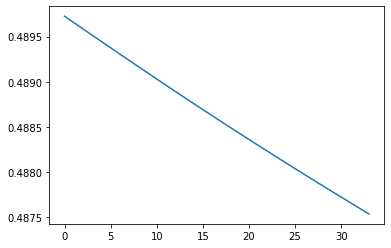

In [20]:
W,b = learnRN(X_train,y)

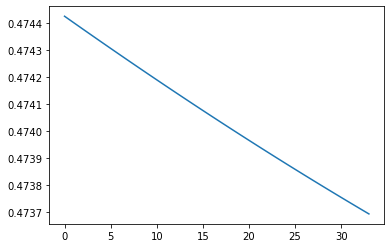

In [21]:
W,b = learnRN(X_train,y,0.01)

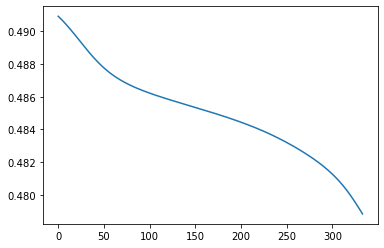

In [22]:
W,b = learnRN(X_train,y,0.01,1000)